In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/dataset.csv")
data.head()

,day_cycle_window,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
0,1_1_1,-0.805191,-1.141993,-1.328327,-1.516693,-1.373962,-0.80827,-1.070547,-0.504352,2.807146,0.495528,-1.246737
1,1_1_1,-0.805191,-1.134902,-1.320393,-1.505848,-1.361560,-0.80784,-1.064212,-0.516000,2.894177,0.494467,-1.244472
2,1_1_1,-0.805191,-1.117304,-1.307167,-1.505848,-1.361560,-0.80784,-1.064212,-0.516000,2.981904,0.429370,-1.244472
3,1_1_1,-0.814231,-1.114206,-1.287593,-1.442302,-1.287565,-0.80784,-1.045557,-0.516000,3.063298,0.348056,-1.244472
4,1_1_1,-0.848104,-1.112276,-1.285393,-1.429076,-1.270722,-0.80784,-1.017575,-0.664906,3.049237,0.118828,-1.270237


# Vizualisation

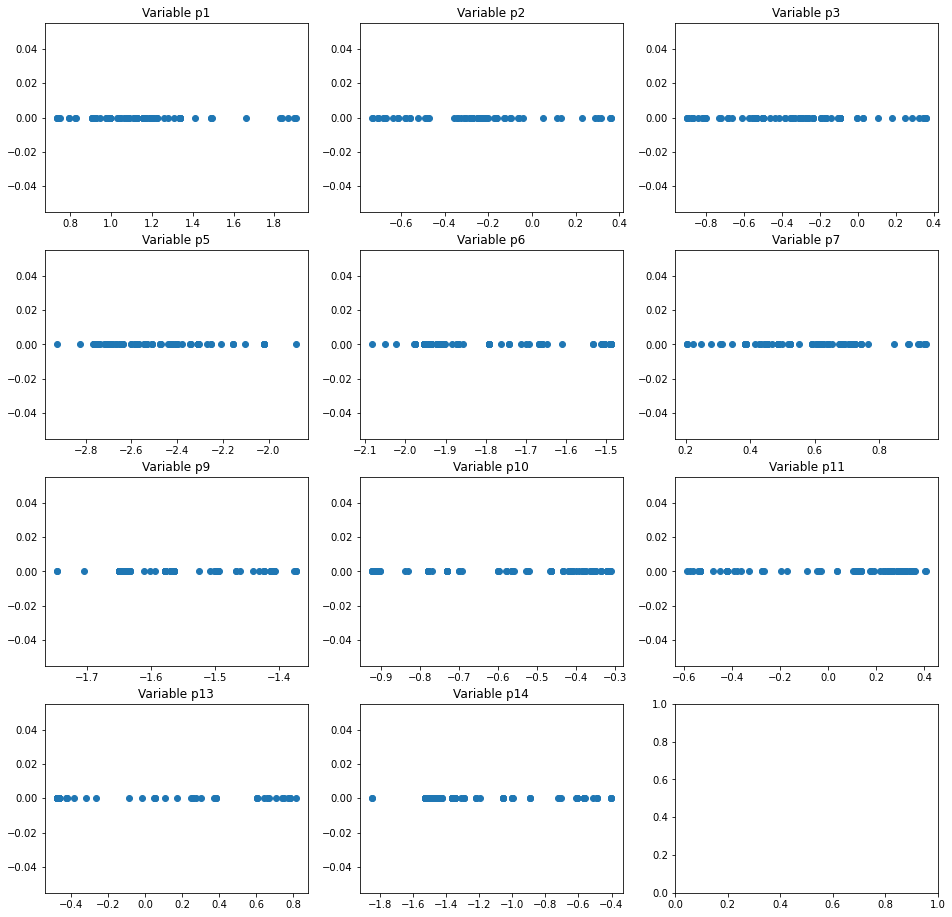

In [51]:
# choice of window we want to look at 
d_c_w = "2_3_6"

data_viz = data.loc[data["day_cycle_window"] == d_c_w]
data_viz.head()

fig, ax = plt.subplots(4, 3, figsize = (16,16))

for i in range(4):
    for j in range(3):
        if i*3+j < 11 :
            x = data_viz.iloc[:,i*3+j+1]
            ax[i,j].plot(x, [0]*len(x), 'o')
            title = "Variable p" + str(i*4+j+1)
            ax[i,j].set_title(title)

# Multi-dimensionnal approach 
  
In this part, we will try several multi-dimensionnal outliers detection algorithms. Given a set of parameters, we will run the algorithm on the different windows and count the number of outliers. The idea is to class windows that have the higher rate of outliers as abnormal.  

In [71]:
#nb_day_cycle_window = np.zeros((4,n,p))

d_c_w = "6_3_6"

n_days = 4 
n_cycles = np.zeros(4, dtype=int)

for i in range(4):
    while True : 
        n_cycles[i] += 1 
        d_c_w = str(i+1) + "_" + str(n_cycles[i]) + "_1"

        if data.loc[data["day_cycle_window"] == d_c_w].empty :
            break
    
    n_cycles[i] -= 1 


In [73]:
print(n_cycles)

[5 3 3 4]


In [78]:
n_windows = np.zeros((4, np.max(n_cycles)), dtype=int)

for i in range(4):
    for j in range(n_cycles[i]):
        while True : 
            n_windows[i,j] += 1 
            d_c_w = str(i+1) + "_" + str(j+1) + "_" + str(n_windows[i,j])

            if data.loc[data["day_cycle_window"] == d_c_w].empty :
                break
        
        n_windows[i,j] -= 1 

In [141]:
print(n_windows)

print('Nombre de fenêtres total : ', np.sum(n_windows))

[[ 68 181   6  17  94]
 [181  76 145   0   0]
 [181  52 181   0   0]
 [ 49 181  65 160   0]]
Nombre de fenêtres total :  1637


In [80]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [ ]:
# clf_name = 'Elliptic Envelope'
# clf = EllipticEnvelope(contamination=0.15)
# clf.fit(df[['X1','X2']])


# clf_name = 'Isolation Forest'
# clf = IsolationForest(n_estimators=100, contamination=0.15)
# clf.fit(df[['X1','X2']])


# clf_name = 'Local Outlier Factor'
# clf = LocalOutlierFactor(n_neighbors=5, contamination=0.15, novelty=True)
# clf.fit(df[['X1','X2']])


# clf_name = 'One Class SVM'
# clf = OneClassSVM(nu=0.15, kernel="rbf", gamma=0.3) # nu corresponds to contamination
# clf.fit(df[['X1','X2']])

In [143]:
## Isolation Forest

clf = IsolationForest(n_estimators=10, contamination="auto")

scores = np.zeros((4, np.max(n_cycles), np.max(n_windows)))

for i in range(4):
    print('Day ' + str(i+1) + ' (en cours)')

    for j in range(n_cycles[i]):
        print('Cycle ' + str(j+1) + ' (en cours)')

        for k in range(n_windows[i,j]):
            d_c_w = str(i+1) + "_" + str(j+1) + "_" + str(k+1)
            df = data.loc[data["day_cycle_window"] == d_c_w].drop(['day_cycle_window'], axis=1)

            df_fit = clf.fit_predict(df)
            scores[i,j,k] = len(df_fit == -1)


Day 1 (en cours)
Cycle 1 (en cours)
Cycle 2 (en cours)
Cycle 3 (en cours)
Cycle 4 (en cours)
Cycle 5 (en cours)
Day 2 (en cours)
Cycle 1 (en cours)
Cycle 2 (en cours)
Cycle 3 (en cours)
Day 3 (en cours)
Cycle 1 (en cours)
Cycle 2 (en cours)
Cycle 3 (en cours)
Day 4 (en cours)
Cycle 1 (en cours)
Cycle 2 (en cours)
Cycle 3 (en cours)
Cycle 4 (en cours)


100.0
1622


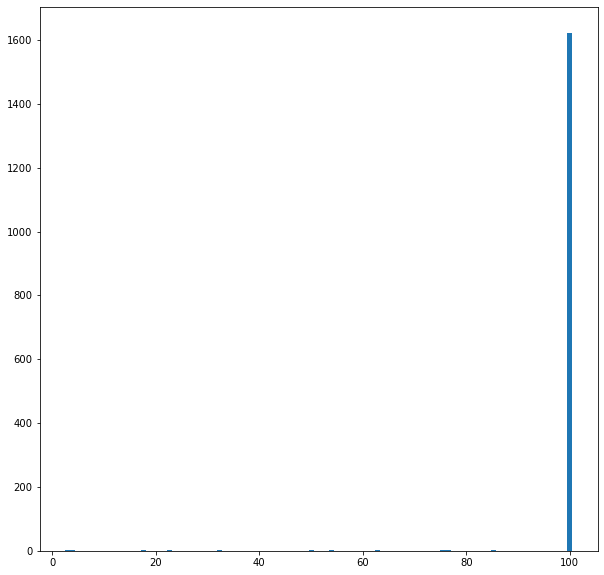

In [147]:
#print(scores)

print(np.max(scores))
print(np.sum(scores == 100.0))

scores_bis = []

n,p,q = np.shape(scores)
scores_reshaped = np.reshape(scores, n*p*q)

for score in scores_reshaped :
    if score > 0 : 
        scores_bis.append(score)

figure = plt.figure(figsize=(10,10))
plt.hist(scores_bis, bins = 100, align="right");